**Author:** [Martina Cinquini](http://pages.di.unipi.it/cinquini/)  
**Python version:**  3.8 <br>
**Last update:** 12/02/21

# FRAMEWORK FOR GENERATING SYNTHETIC DATA WITH KNOWN CAUSALITIES

### Table of Contents

* [Why we need it?](#section1)
* [Causal Dataframe](#section2)

### Why we need it?<a class="anchor" id="section1"></a>

To evaluate the correctness of the causal discovery task, we require *ground-truth* datasets of various 
dimensionalities with *known causal relationships*.

[This](https://github.com/rguo12/awesome-causality-data) is a list of available real-world datasets for learning causal relationships. However, **no synthetic multivariate data are available**. 

To address this critical issue, we developed a generator of synthetic datasets for which the causal structure is known a priori.

<br><br>
<div>
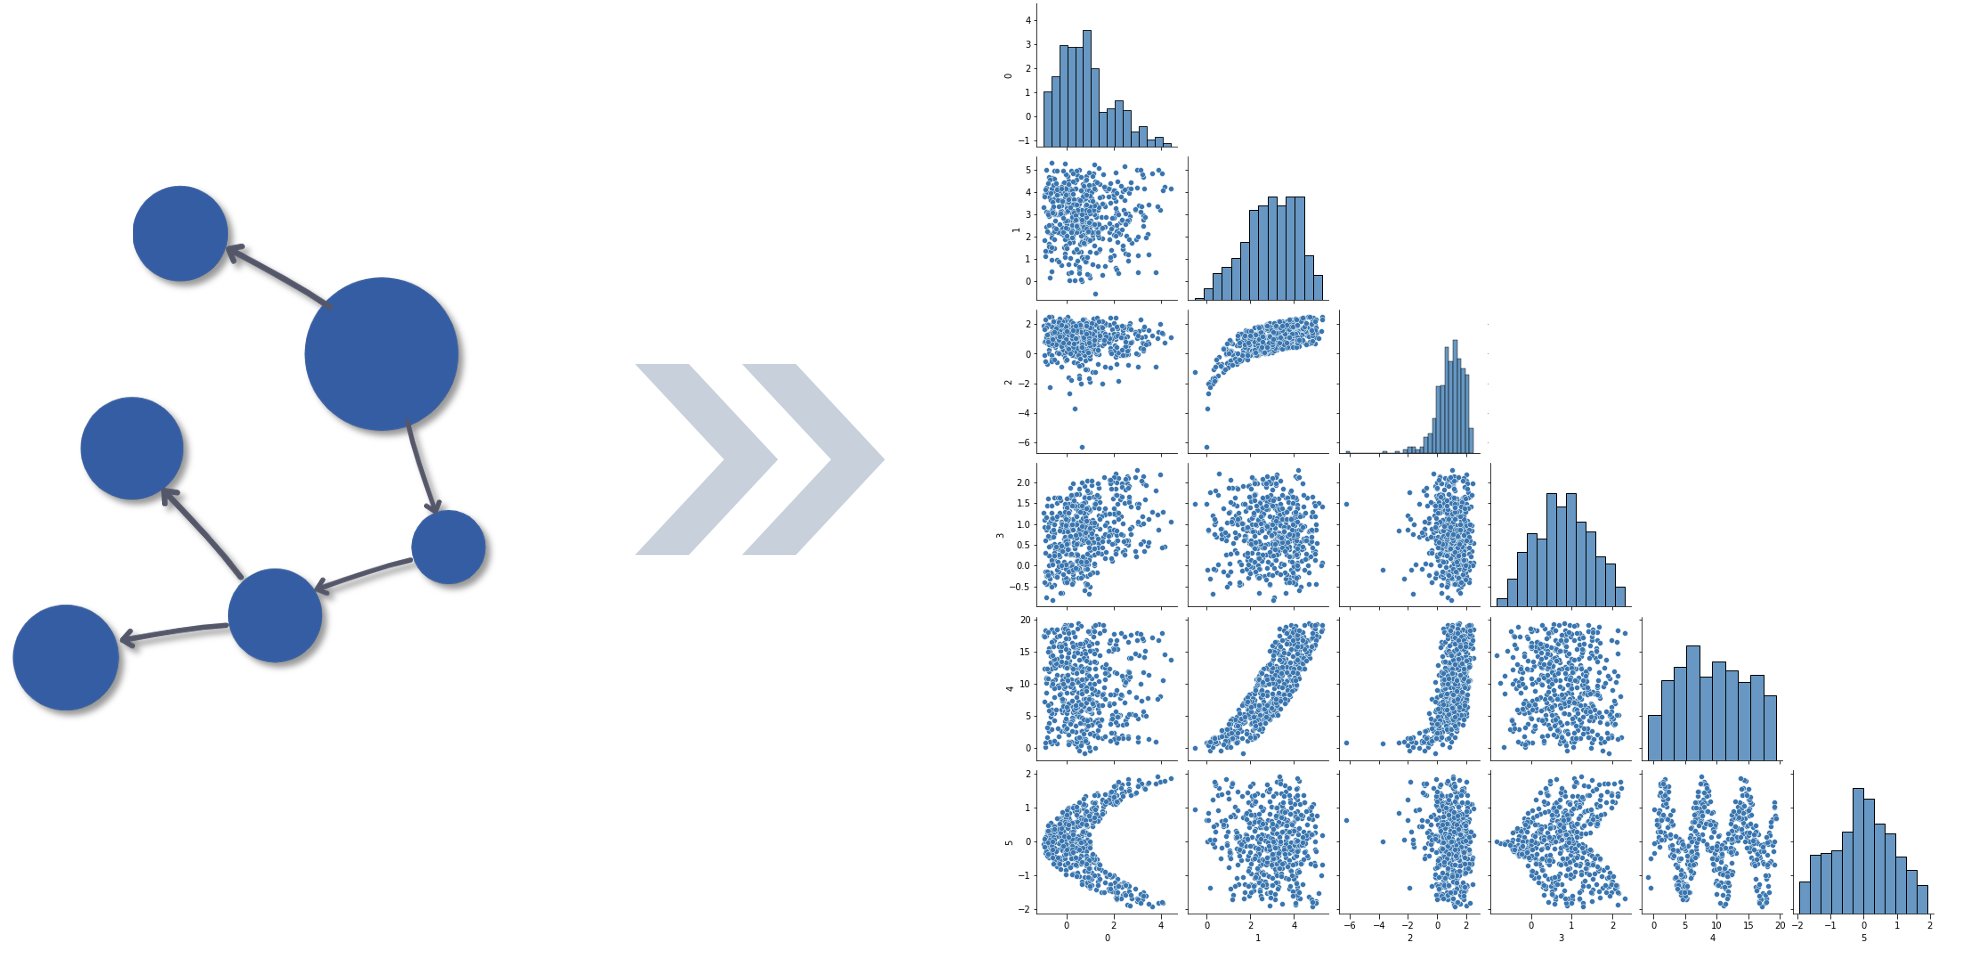
</div>

### Causal Dataframe <a class="anchor" id="section2"></a>

CausalDatframe takes as input a DAG and returns a multivariate continuous dataset respecting the causal relationships where each column in X represents a node in the graph. The synthetic dataset X is generated according to the following steps: <br>

1) The features matching isolated and source nodes are generated, i.e., those modeling independent variables
Following the topological ordering of the DAG, we ensure the independent variables are generated before the dependent ones. <br><br>
2) The features matching dependent variables are generated by combining the parent variables with randomly selected binary functions and by applying to each parent variable a randomly selected nonlinear function among sine, cosine, square root, logarithm, and tangent. 

In [1]:
from causalDataframe import *

In [2]:
path = '/Users/martina/Desktop/'
num_samples = 1500

In [3]:
# Define a DAG
edges = [('0', '2'), ('1', '7'), ('8', '7'), ('1', '4'), ('4', '8')]
isolated_nodes = ['3', '5', '6']

In [4]:
# Instantiate the object
d = CausalDataFrame(num_samples, edges, isolated_nodes)
d.generate_data()

In [5]:
df = d.dataframe
df.head()

,0,1,2,3,4,5,6,7,8
0,53.375047,3.467997,0.266089,62.320930,0.918286,22.879031,77.094886,-0.675235,-0.126308
1,59.515439,34.224452,-0.651779,37.873665,5.277571,21.836617,54.193260,0.258753,0.153618
2,69.317181,20.463771,0.099272,15.864700,5.108572,9.397862,2.979295,12.455977,-1.482993
3,11.463957,8.953825,-1.483885,20.097214,2.172609,43.087493,16.876519,0.556926,-0.052553
4,90.875324,34.541824,0.087801,34.579390,6.462153,83.801513,17.722633,0.436733,-0.535363


In [ ]:
# Another possibility is to create a random DAG
"""
Example

Create a new graph with 5 nodes and 2 edges
"""
# Create a new graph with 5 nodes and 2 edges
# This function returns also a json file. It contains all the information about the dag.
graph = randomDag(path, 4, 2)
print(f'Nodes: {graph.nodes} \nEdges: {graph.edges}')

In [ ]:
with open(path + 'ground_truth.json', 'r') as file:
    dag_info = json.load(file)
dag_info

In [ ]:
obj = CausalDataFrame(num_samples, graph)
obj.generate_data()

In [ ]:
df = obj.dataframe
df.head()

In [ ]:
obj.show_graph(node_size=1000, font_size=14)

In [6]:
obj.show_graph(node_size=1000, font_size=14)

Nodes: [0, 1, 2, 3] 
Edges: [(1, 0), (2, 0)]


In [7]:
with open(path + 'ground_truth.json', 'r') as file:
    dag_info = json.load(file)
dag_info

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}],
 'links': [{'source': 1, 'target': 0}, {'source': 2, 'target': 0}]}

In [8]:
obj = CausalDataFrame(num_samples, graph)
obj.generate_data()

In [9]:
df = obj.dataframe
df.head()

,0,1,2,3
0,-10.880098,49.865378,35.225234,8.630070
1,5.931451,46.181782,70.764443,28.558397
2,30.020035,39.764275,40.623882,63.976629
3,6.763037,52.164961,20.215556,53.625182
4,-192.853459,14.345888,75.378566,39.251992


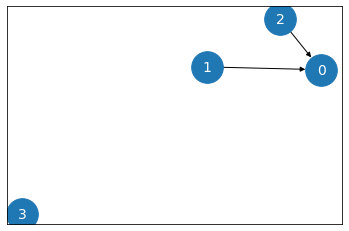

In [10]:
obj.show_graph(node_size=1000, font_size=14)